<a href="https://colab.research.google.com/github/Jackson00Han/Time-Series-Training/blob/main/multivariate_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 9)

In [4]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [5]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('datetime', inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
# Verify the time series is continous
time_diffs = df.index.to_series().diff()
time_diffs[time_diffs != time_diffs.mode()[0]]

,datetime
datetime,
2006-12-16 17:24:00,NaT


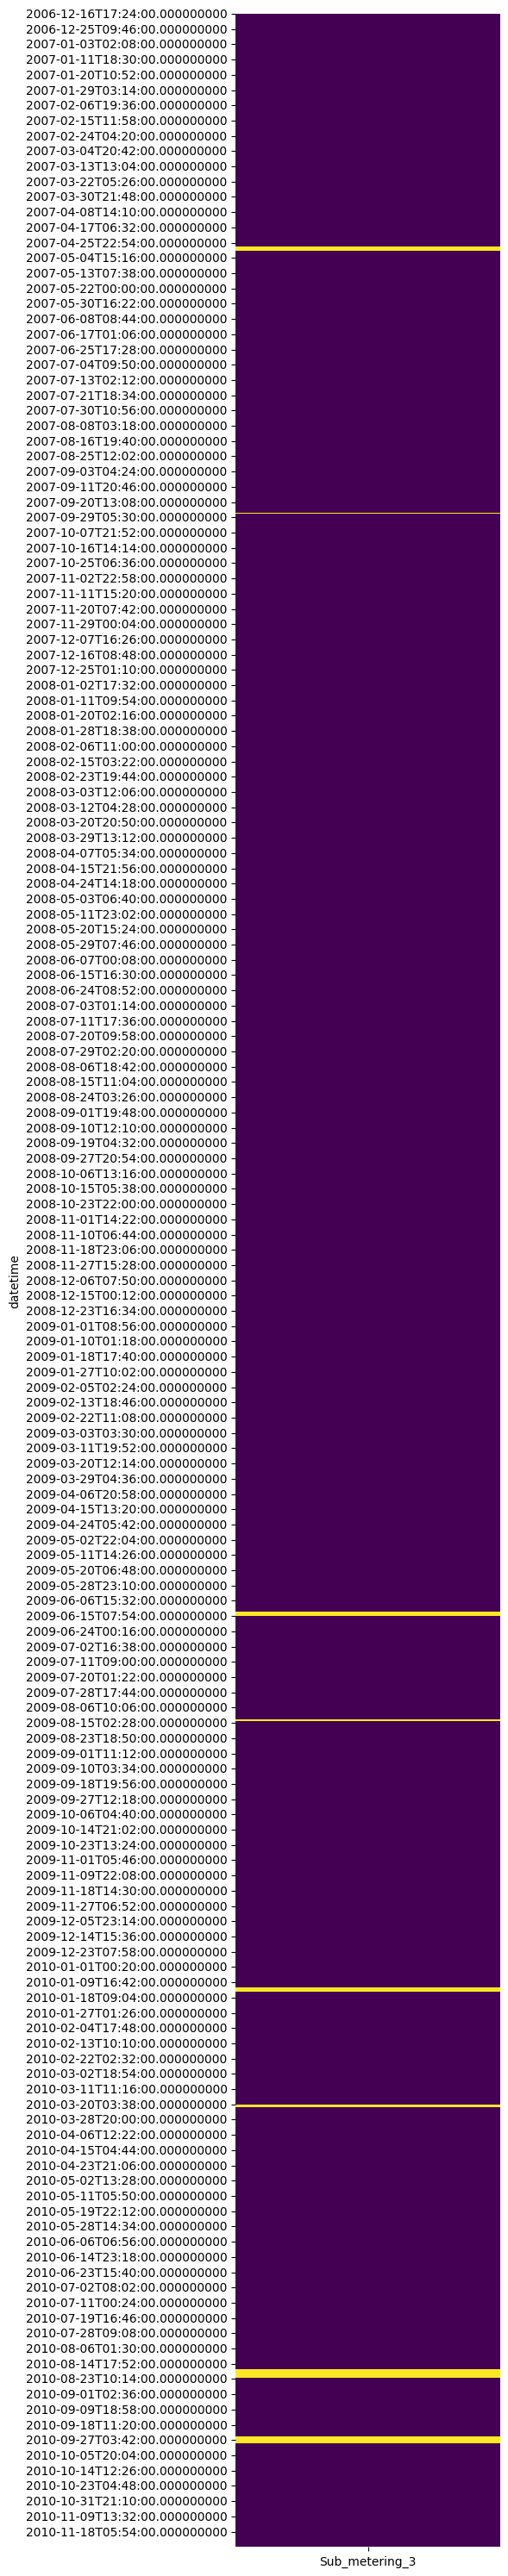

In [7]:
# Visualize the missing values
fig, ax = plt.subplots(figsize=(6, 30))

sns.heatmap(df['Sub_metering_3'].isna().to_frame(), cbar=False,cmap='viridis')
plt.tight_layout()
plt.show()

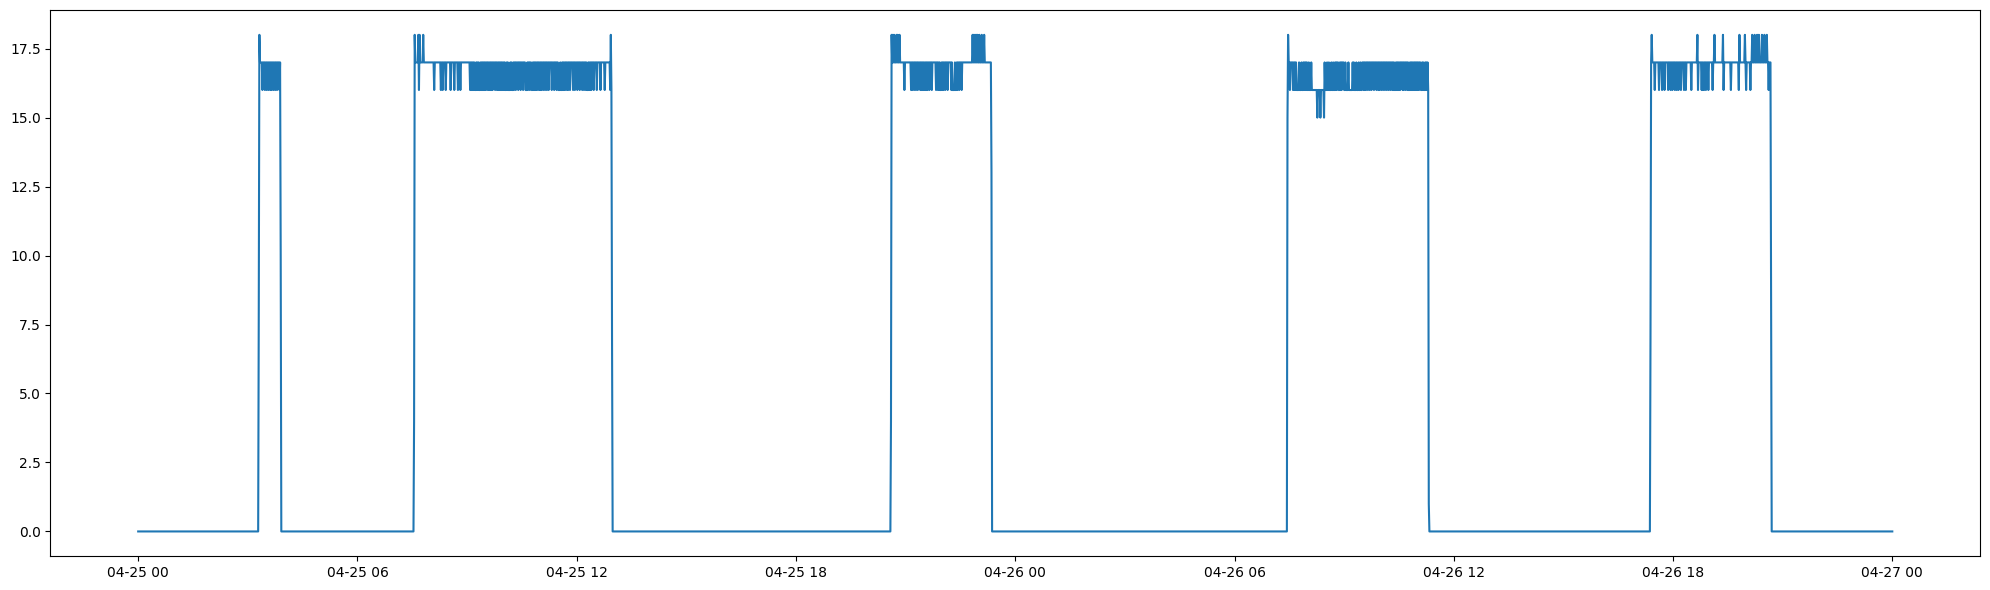

In [8]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df['Sub_metering_3'].loc['2007-04-25 00:00:00':'2007-04-27 00:00:00'])
plt.tight_layout()
plt.show()

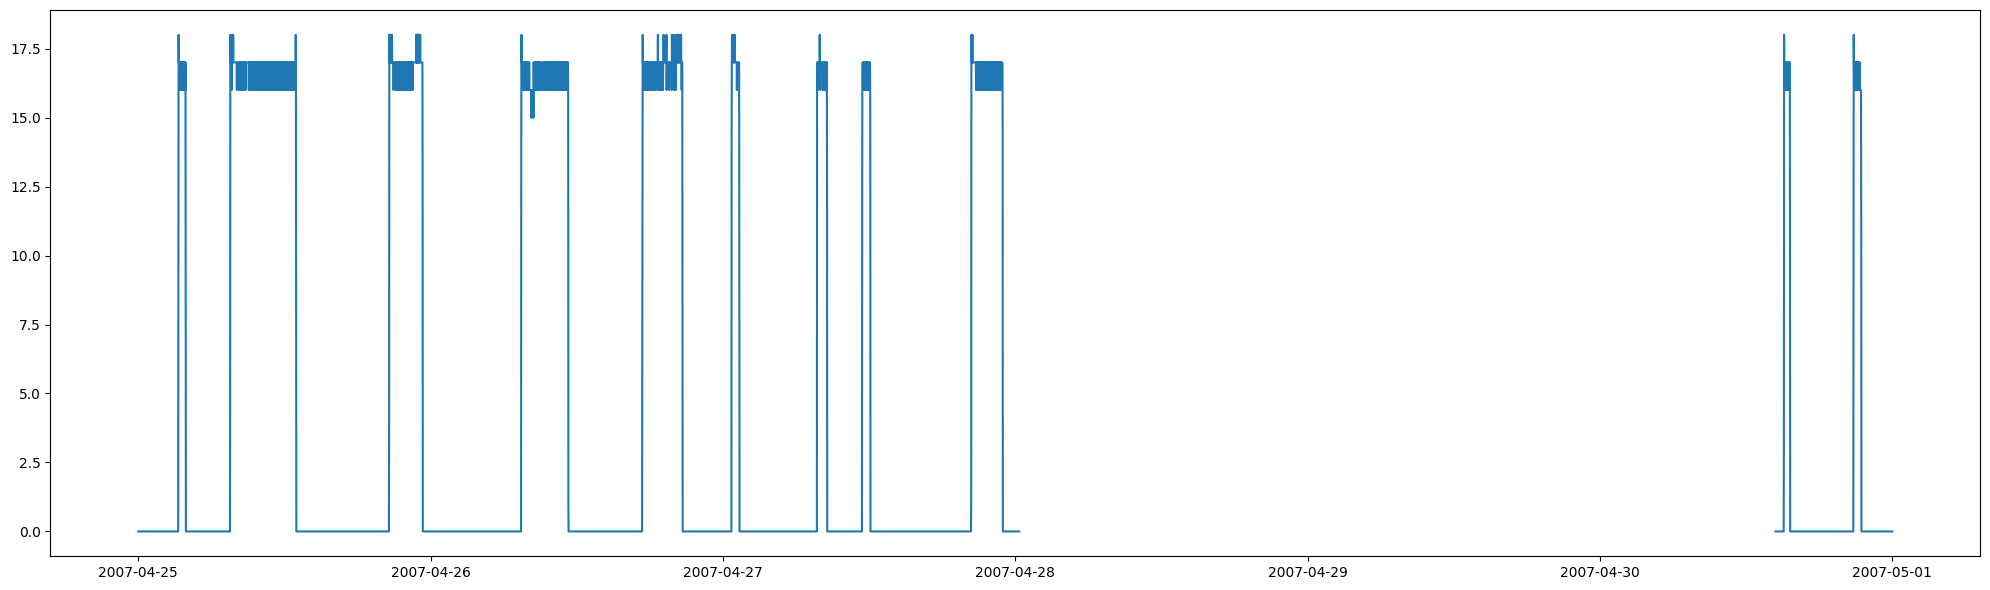

In [9]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df['Sub_metering_3'].loc['2007-04-25 00:00:00':'2007-05-01 00:00:00'])
plt.tight_layout()
plt.show()

In [10]:
# The best way to imputing the missing value could be using time seroes models to predict these value, but to save time,
# I will use the mean value interpolation here, as our aim is to practice the LSTM model on multivariate time series
window_wize = 60*24*7

df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].rolling(window_wize, min_periods=1).mean())
df['Sub_metering_3'].isna().sum()

0

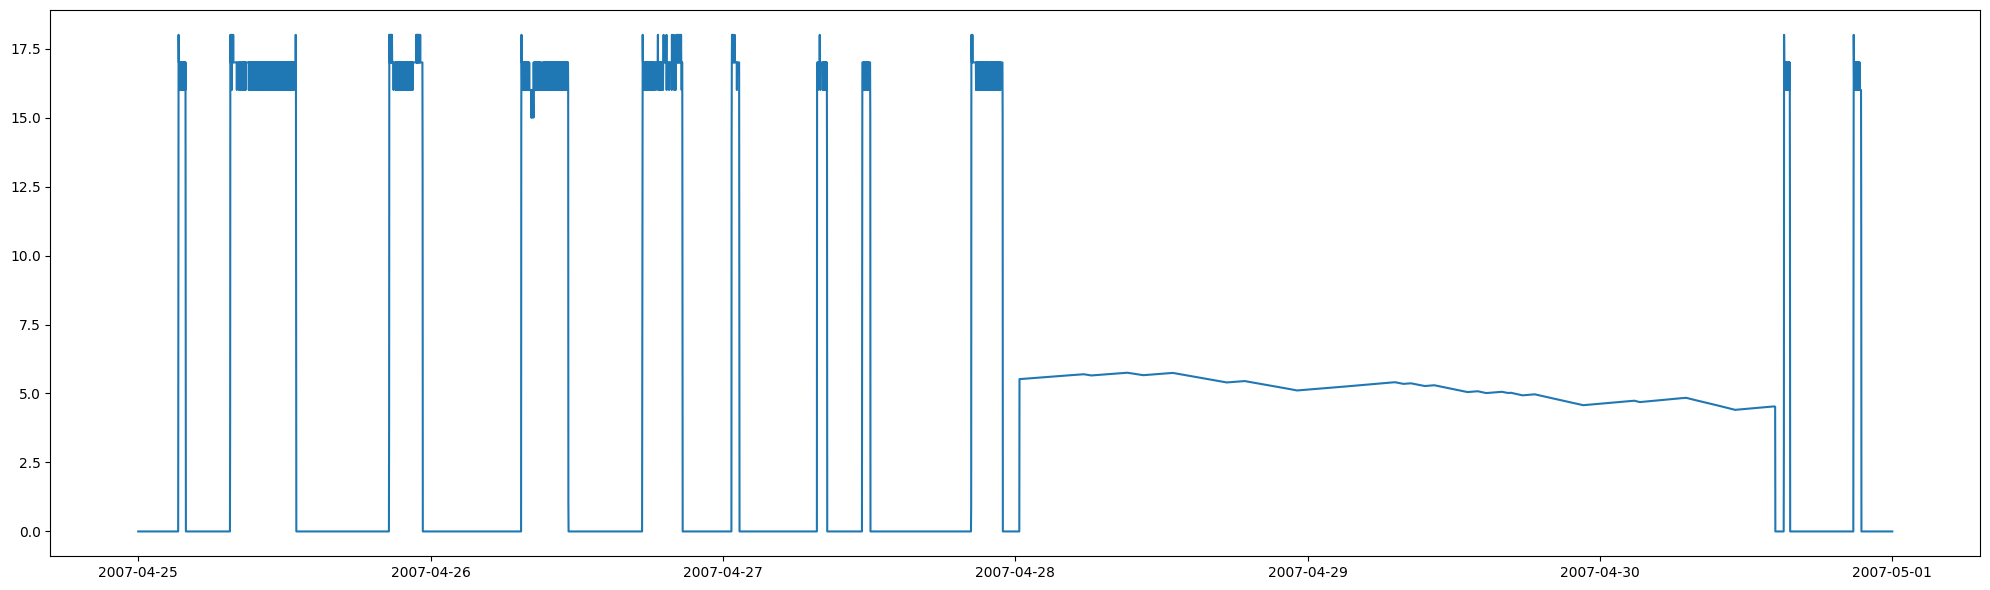

In [11]:
# Check it again

fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df['Sub_metering_3'].loc['2007-04-25 00:00:00':'2007-05-01 00:00:00'])
plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [13]:
df.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [14]:
# Convert other columns to numeric, handling non-numeric values
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' replaces non-numeric with NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## EDA

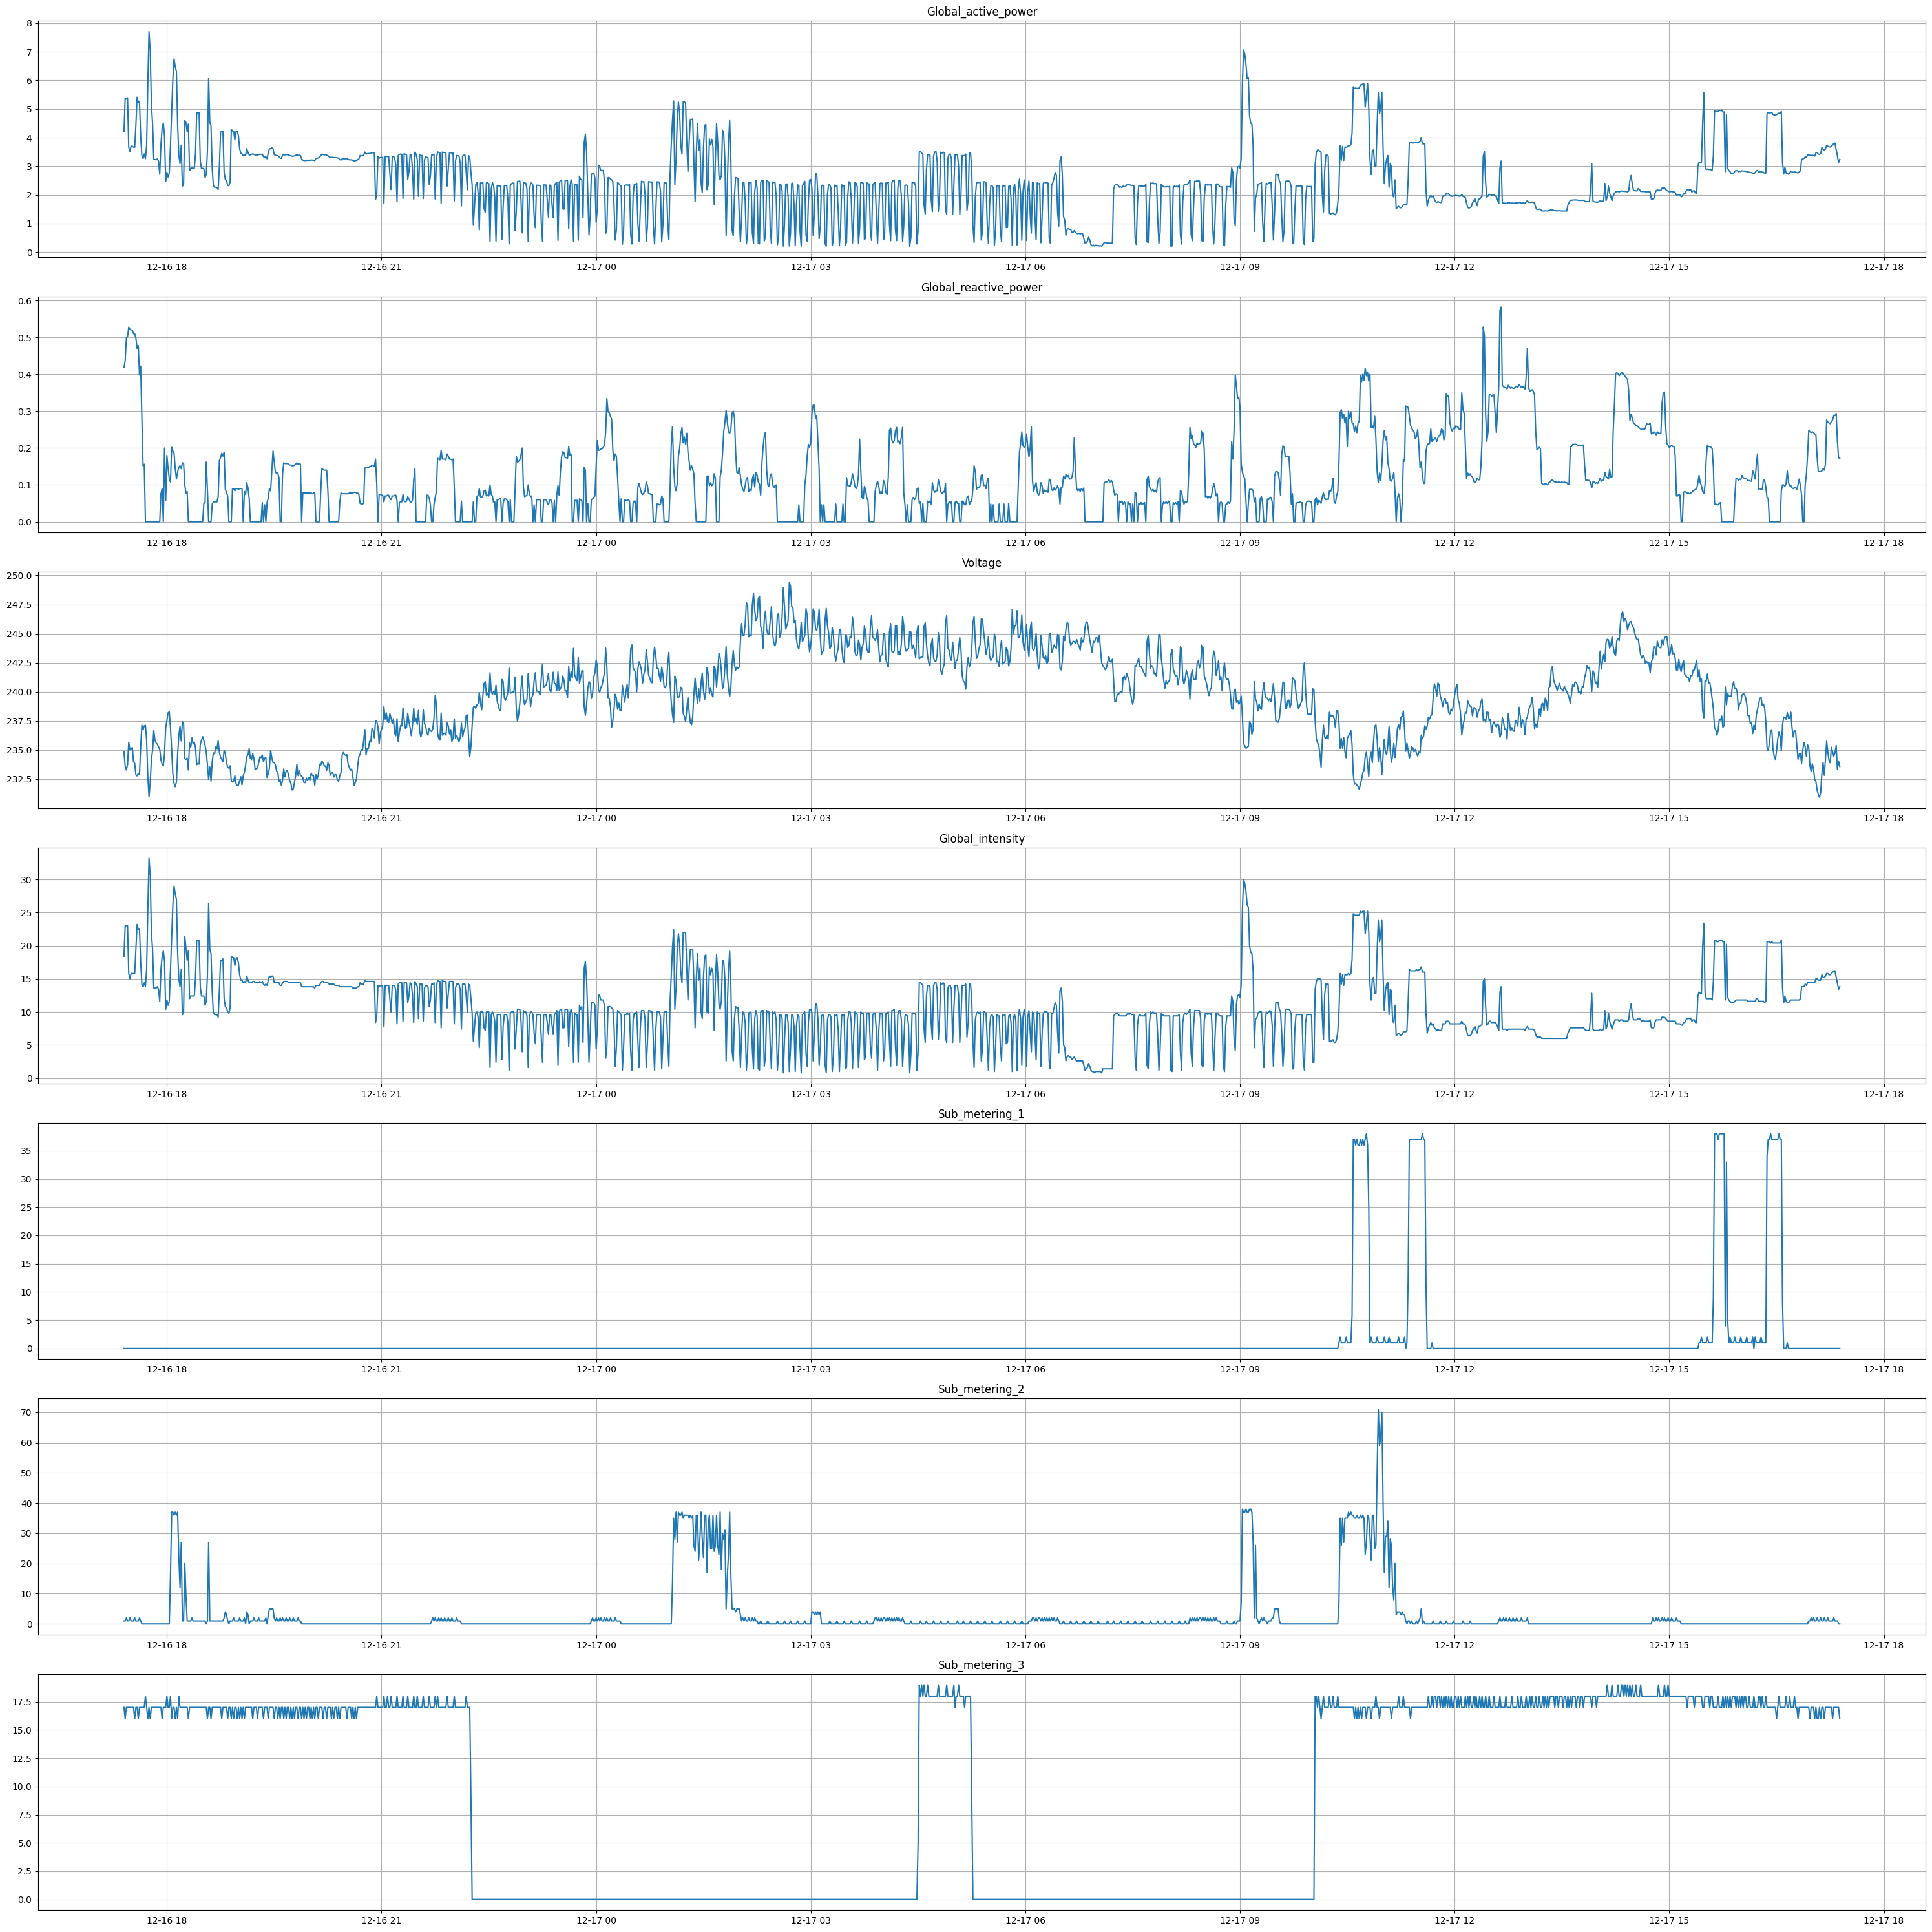

In [15]:
fig, axs = plt.subplots(7, 1, figsize=(30, 30))

for i, col in enumerate(df.columns[:]):
    axs[i].plot(df.index[:60*24], df[col][:60*24])
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

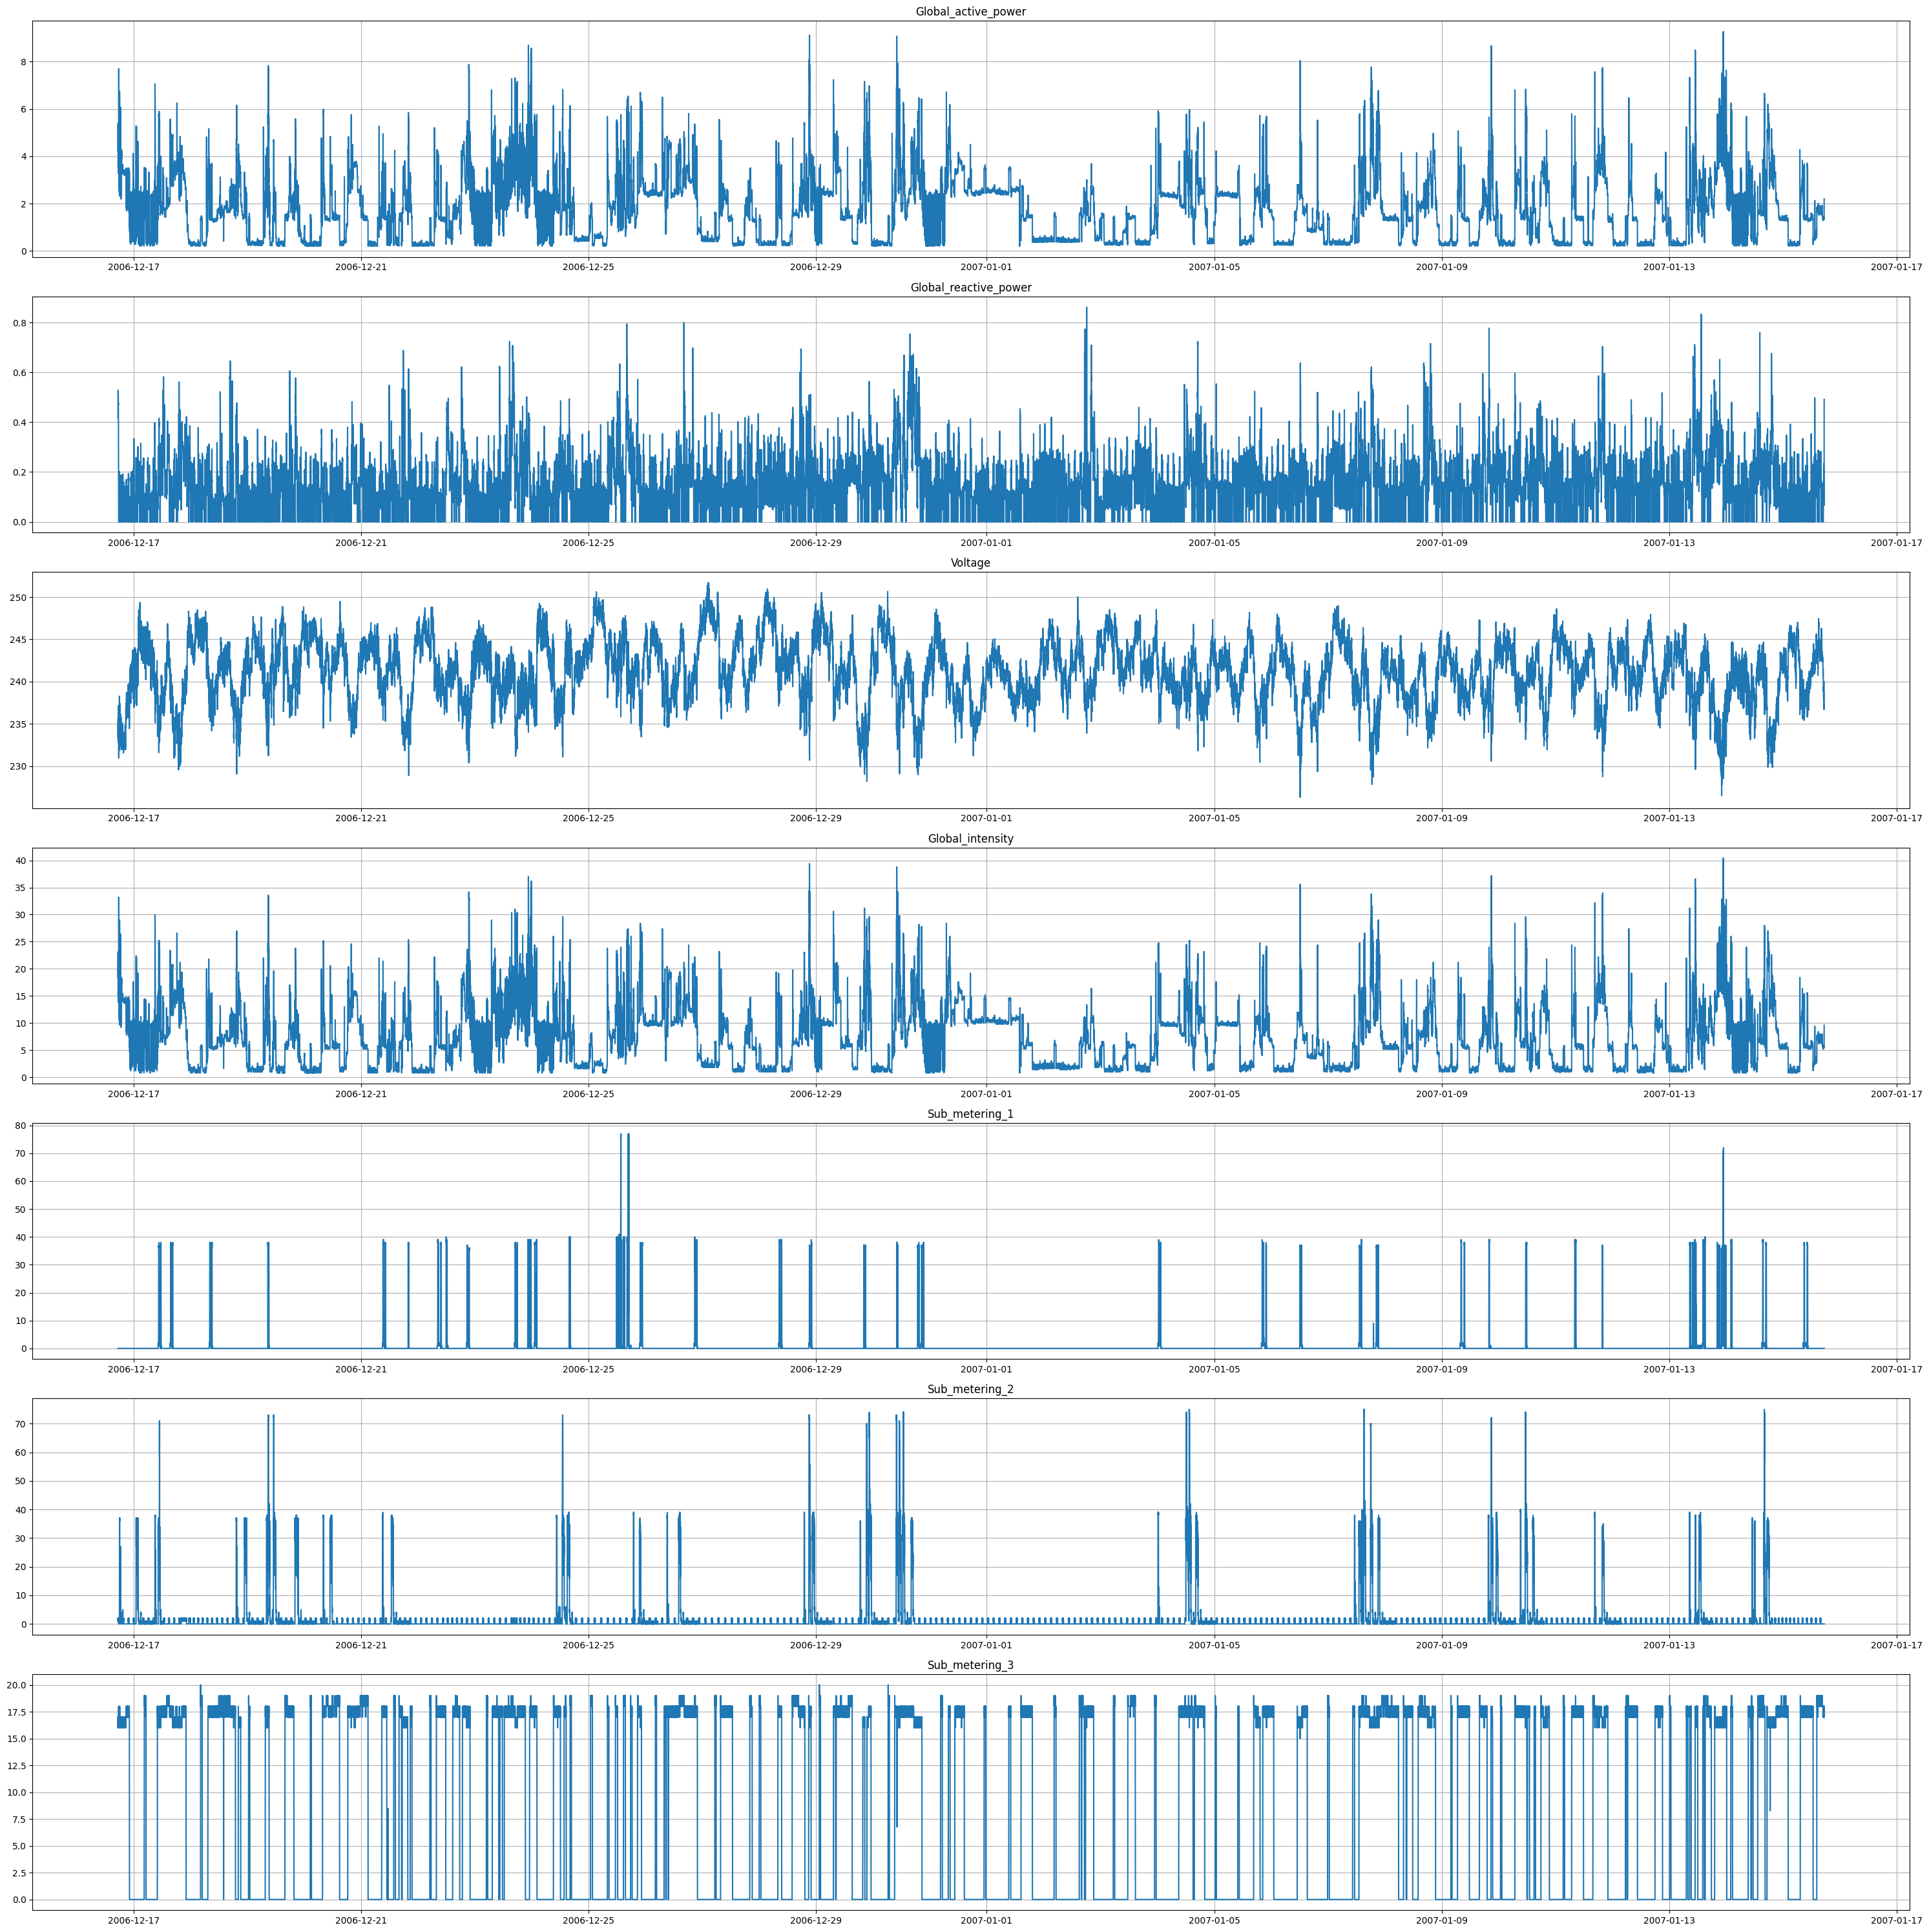

In [16]:
fig, axs = plt.subplots(7, 1, figsize=(30, 30))

for i, col in enumerate(df.columns):
    axs[i].plot(df.index[:60*24*30], df[col][:60*24*30])
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [17]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [18]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [121]:
split_time = '2010-10-31 23:59:00'
train = df[df.index<=split_time]
test = df[df.index>split_time]

In [135]:
sample = train[-10000:][['Global_active_power', 'Sub_metering_1', 'Sub_metering_2']]
sample

,Global_active_power,Sub_metering_1,Sub_metering_2
datetime,,,
2010-10-25 01:20:00,0.370,0.0,1.0
2010-10-25 01:21:00,0.368,0.0,2.0
2010-10-25 01:22:00,0.366,0.0,1.0
2010-10-25 01:23:00,0.412,0.0,1.0
2010-10-25 01:24:00,0.440,0.0,1.0
...,...,...,...
2010-10-31 23:55:00,2.460,0.0,0.0
2010-10-31 23:56:00,2.408,0.0,0.0
2010-10-31 23:57:00,1.364,0.0,0.0


In [136]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series, not necessarily univariate
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [137]:
# Parameters
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(sample, window_size, batch_size, shuffle_buffer_size)

In [139]:
for windows in train_set.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 60, 3)
shape of second element: (32, 3)


In [140]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten


# Build the RNN Model
model = Sequential([
    SimpleRNN(16, return_sequences=False, input_shape=[window_size, sample.shape[1]]),
    Dense(8, activation='relu'),
    Dense(sample.shape[1])  # Output layer for multivariate prediction
])

# Compile the model
model.compile(loss="mse", optimizer="adam")

# Train the model
model.fit(train_set, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 8.9823
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


311/311 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 6.6956
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 4.4353
Epoch 4/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.5358
Epoch 5/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 1.5097
Epoch 6/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 1.0723
Epoch 7/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.9481
Epoch 8/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.8970
Epoch 9/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.9277
Epoch 10/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.9141


In [142]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In [143]:
sample_test = test[:1000][['Global_active_power', 'Sub_metering_1', 'Sub_metering_2']]

In [144]:
forecast = model_forecast(model, sample_test, window_size, batch_size)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [148]:
forecast.shape

(941, 3)

In [157]:
forecast1 = forecast[:,0].tolist()

In [149]:
valid = test[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2']][60:1001]
valid.shape

(941, 3)

In [159]:
valid = valid.iloc[:,0].tolist()

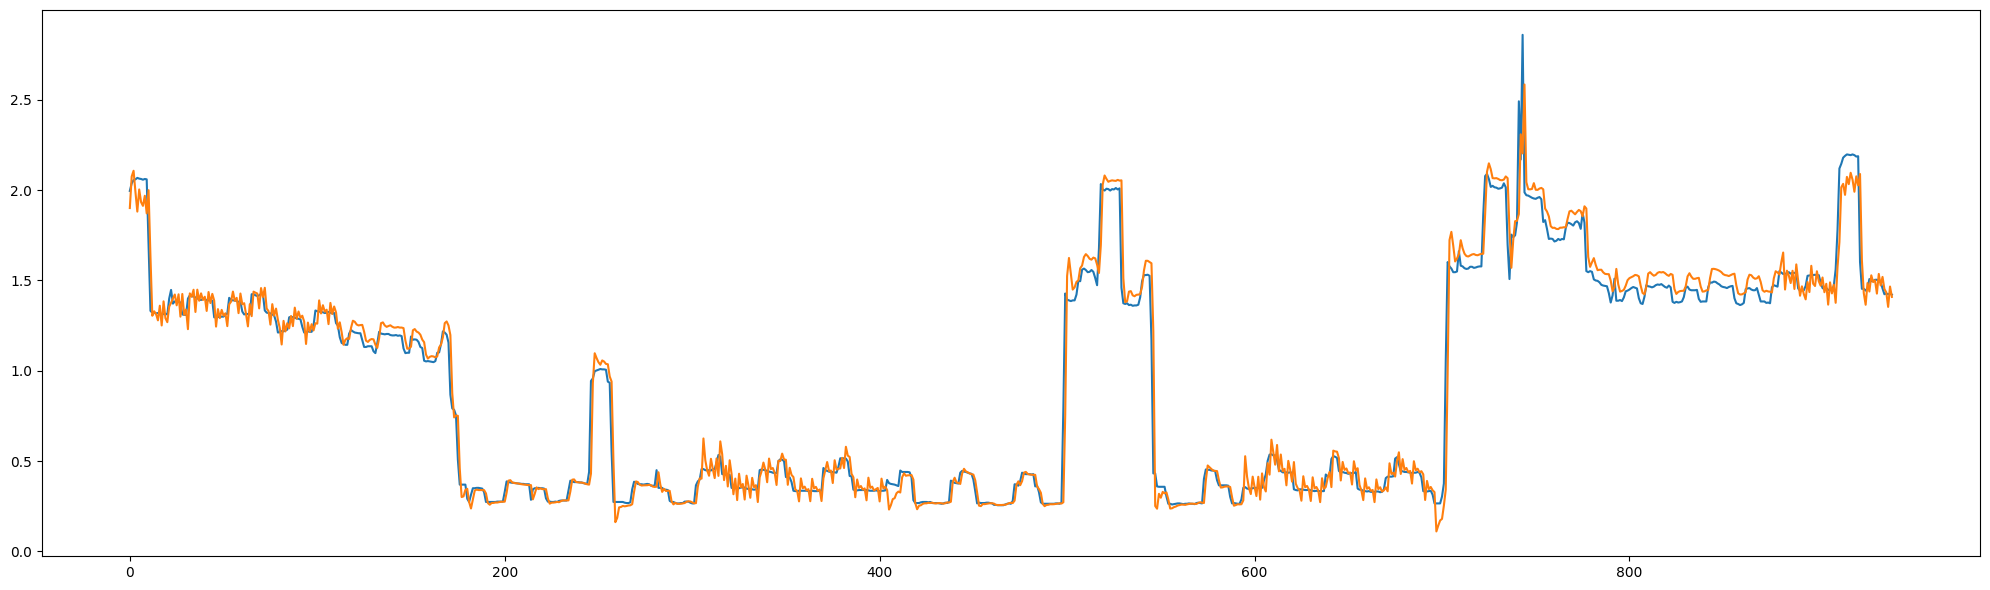

In [161]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(valid)
ax.plot(forecast1)
plt.tight_layout()
plt.show()